In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn . cluster import DBSCAN

In [31]:
data = {
"X": [1 , 2, 3, 4, 5, 6, 7, 8 , 9 , 10] ,
"Y": [2 , 4, 6, 8, 10 , 12 , 14 , 16 , 18 , 50] # Last value is an outlier
}
df = pd . DataFrame ( data )

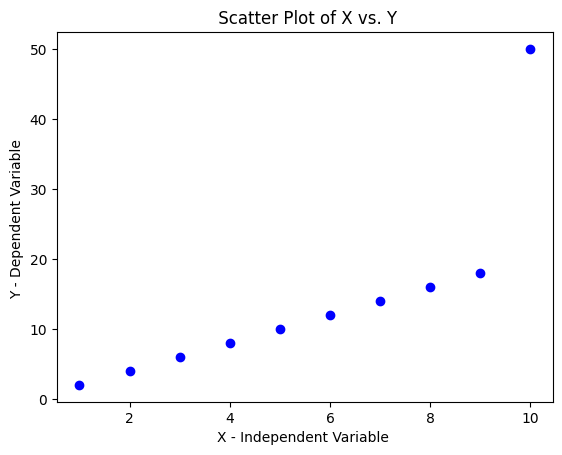

In [32]:
plt . scatter ( df ['X'] , df ['Y'], color ='blue')
plt . title (" Scatter Plot of X vs. Y")
plt . xlabel ("X - Independent Variable ")
plt . ylabel ("Y - Dependent Variable ")
plt . show ()

In [33]:
mean_y = np.mean ( df ['Y'])
std_y = np.std ( df ['Y'])

In [34]:
threshold = 2.7
outliers = df [ np .abs ( df ['Y'] - mean_y ) > threshold * std_y ]
print (" Outliers :\n", outliers )

 Outliers :
     X   Y
9  10  50


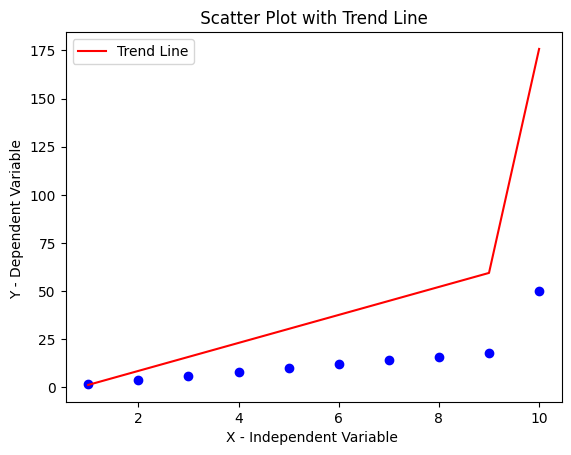

In [35]:
# Fit a linear regression line
m , b = np . polyfit ( df ["X"], df ["Y"], 1) # Slope and intercept
plt . scatter ( df ["X"] , df ["Y"], color ='blue')
plt . plot ( df ["X"], m * df ["Y"] + b , color ="red", label = "Trend Line")
plt . title (" Scatter Plot with Trend Line ")
plt . xlabel ("X - Independent Variable ")
plt . ylabel ("Y - Dependent Variable ")
plt . legend ()
plt . show ()

In [36]:
model = IsolationForest ( contamination =0.1)
df ['outlier'] = model . fit_predict ( df [[ 'X', 'Y']])

In [37]:
df

,X,Y,outlier
0,1,2,1
1,2,4,1
2,3,6,1
3,4,8,1
4,5,10,1
5,6,12,1
6,7,14,1
7,8,16,1
8,9,18,1
9,10,50,-1


In [38]:
model = DBSCAN ( eps =0.5 , min_samples =5)
df ['outlier'] = model . fit_predict ( df [["X", "Y"]])

In [40]:
df

,X,Y,outlier
0,1,2,-1
1,2,4,-1
2,3,6,-1
3,4,8,-1
4,5,10,-1
5,6,12,-1
6,7,14,-1
7,8,16,-1
8,9,18,-1
9,10,50,-1
